# Usage Notes
This notebook demonstrates how to interact with the NWB files in the Rodgers 2022 dataset.

In [1]:
# NWB imports and DANDI imports
import pynwb
from pynwb import NWBHDF5IO
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
## This loads the NWB file without requiring the user to download the file
# This ID specifies the object recognition dataset
# dandiset_id = '000231'
 
# First get the URI for the NWB file on dandihub
# with DandiAPIClient() as client:
#     asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
#     s3_path = asset.get_content_url(follow_redirects=1, strip_query=True)

bin_len = 100 * 0.001

mouse_id = 'sub-221CR_ses-20190515T160400'
# mouse_id = 'sub-221CR_ses-20190514T142312'
# mouse_id = 'sub-231CR_ses-20190921T144923'
# mouse_id = 'sub-231CR_ses-20190924T161413'
# mouse_id = 'sub-KM131_ses-20180117T194023'
# mouse_id = 'sub-267CR_ses-20200331T161053'
# mouse_id = 'sub-245CR_ses-20200331T142427'
# mouse_id = 'sub-KF134_ses-20180208T171905'

base_path = '../data_own/'+mouse_id
s3_path = base_path + '/{}_behavior+ecephys+image.nwb'.format(mouse_id)

# This creates an IO object for the file
# If the file was downloaded locally, replace `s3_path` with the path to the file, and don't specify a driver
# io = NWBHDF5IO(s3_path, mode='r', load_namespaces=True, driver='ros3')
io = NWBHDF5IO(s3_path, mode='r', load_namespaces=True)

# Read the file
nwbfile = io.read()

/Users/mithileshvaidya/miniforge3/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [3]:
nwbfile

root pynwb.file.NWBFile at 0x5976403360
Fields:
  acquisition: {
    behavioral video <class 'pynwb.image.ImageSeries'>,
    extracellular array recording <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    4253 <class 'pynwb.device.Device'>,
    high-speed camera <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    all_channels <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: Video of mouse performing whisker-based shape discrimination. This session also contains neural recordings in barrel cortex
  experimenter: ['Chris Rodgers']
  file_create_date: [datetime.datetime(2022, 4, 14, 17, 50, 57, 716583, tzinfo=tzoffset(None, -14400))]
  identifier: 190515_221CR
  institution: Columbia University
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (12,), type "|O">
  processing: {
    behavior <class 'pynwb.base.Pr

In [4]:
nwbfile.acquisition

{'behavioral video': behavioral video pynwb.image.ImageSeries at 0x5976392464
 Fields:
   comments: All times in the NWB file are defined with respect to this video, which starts at 0 and proceeds at exactly 200 fps
   conversion: 1.0
   data: <HDF5 dataset "data": shape (0, 0, 0), type "|u1">
   description: External file: behavioral video of whiskers
   device: high-speed camera pynwb.device.Device at 0x5976392992
 Fields:
   description: DR1-D1312IE-100-G2-8
   manufacturer: Photonfocus
 
   dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
   external_file: <StrDataset for HDF5 dataset "external_file": shape (1,), type "|O">
   format: external
   offset: 0.0
   rate: 200.0
   resolution: -1.0
   starting_frame: [0]
   starting_time: 0.0
   starting_time_unit: seconds
   unit: unknown,
 'extracellular array recording': extracellular array recording pynwb.ecephys.ElectricalSeries at 0x5976393232
 Fields:
   comments: broken channels excluded. original sampling was at 30 

In [5]:
num_unique_neurons = len(nwbfile.units.id)
print("Number of unique neurons:", num_unique_neurons)
spike_data = nwbfile.units[:]
spike_data

Number of unique neurons: 35


,inhibitory,depth,layer,neuron_channel,spike_times,obs_intervals
id,,,,,,
0,False,929.7,5b,44,"[65.13726548319993, 65.89599883115314, 66.3125...","[[60.28106538962675, 3525.701932164156]]"
2,False,589.7,4,27,"[62.62569876813836, 64.52246547135347, 64.6325...","[[60.28106538962675, 3525.701932164156]]"
12,False,569.7,4,26,"[83.71593250785538, 88.94999927537624, 101.671...","[[60.28106538962675, 3525.701932164156]]"
15,False,669.7,5a,31,"[60.28476538969804, 60.347465390906194, 60.390...","[[60.28106538962675, 3525.701932164156]]"
17,False,589.7,4,27,"[60.62596539627255, 60.642765396596275, 60.723...","[[60.28106538962675, 3525.701932164156]]"
18,False,549.7,4,25,"[63.39686544966449, 63.831198791366916, 63.971...","[[60.28106538962675, 3525.701932164156]]"
22,False,549.7,4,25,"[60.36323205787666, 60.4125653921606, 60.42346...","[[60.28106538962675, 3525.701932164156]]"
28,False,269.7,2/3,11,"[72.89779896606949, 72.90699896624675, 83.4358...","[[60.28106538962675, 3525.701932164156]]"
32,False,749.7,5b,35,"[60.40143205861274, 60.626465396282185, 60.843...","[[60.28106538962675, 3525.701932164156]]"


In [6]:
# Behavioral data for each trial
# These are trial-level parameters (instead of spikes which are bin-level)
trials = nwbfile.trials[:]
# print(trials)
trials[trials.index == 47]

,start_time,stop_time,direct_delivery,stim_is_random,optogenetic,outcome,choice,rewarded_side,servo_position,stimulus,ignore_trial,choice_time,response_window_open_time,trial
id,,,,,,,,,,,,,,
47,433.04,440.95,False,True,False,correct,left,left,medium,concave,False,436.218,436.062,47


In [7]:
def get_bin(start_time, event_time, win=bin_len):
    """
    Get bin index of event
    start_time: offset which should be subtracted
    event_time: time of event
    win: length of window
    """
    adjusted = event_time - start_time
    return int(adjusted/win)

In [8]:
# random trial
print(trials.loc[100])
# find unique values in the column servo_istion
np.unique(trials['servo_position'], return_counts=True)

start_time                    1042.78
stop_time                     1049.58
direct_delivery                 False
stim_is_random                   True
optogenetic                     False
outcome                       correct
choice                           left
rewarded_side                    left
servo_position                 medium
stimulus                      concave
ignore_trial                    False
choice_time                  1045.941
response_window_open_time    1045.804
trial                             100
Name: 100, dtype: object


(array(['close', 'far', 'medium'], dtype=object), array([108, 109, 102]))

In [9]:
trial_data = {}
# mapping for neuron_id -> index in spike data
mapping = dict(zip(spike_data.index, range(len(spike_data))))
# print(mapping)
for trial_index, row in trials.iterrows():
#     print("On trial {}/{}".format(trial_index, trials.index[-1]))
    # ignore trials since they could be non-random
    if row['ignore_trial'] or row['stimulus'] == 'nothing':
        continue
    # keep only those trials in which the mouse licked within 0.5 seconds of opening of response window
    if row['choice_time'] - row['response_window_open_time'] > 0.5:
        continue
    if not row['stim_is_random']:
        warnings.warn("Stimulus is not random")
    if row['optogenetic']:
        warnings.warn("Optogenetic")
    if row['direct_delivery']:
        warnings.warn("Direct delivery")
    
    # extract start and end times so that we can accordingly extract the spikes
    # start_t, end_t = row['start_time'], row['stop_time']
    # num_bins = get_bin(start_t, end_t, bin_len)+1
    
    # use [window_open - 2, window_open 0.5] as the time window
    start_t, end_t = round(row['response_window_open_time'] - 2, 5), round(row['response_window_open_time'] + 0.5, 5) - 1e-4    
    # number of bins. +1 since 0-indexing 
    num_bins = get_bin(start_t, end_t, bin_len)+1
    # extract spike data
    arr = np.zeros((num_bins, num_unique_neurons))
    # iterate over neural spike data
    for n_index, row in spike_data.iterrows():        
        stimes = row['spike_times']
        cur_idx = 0
        # find start time
        # print(start_t, end_t, stimes)
        while cur_idx < len(stimes) and stimes[cur_idx] < start_t:
            cur_idx += 1
        # append to each bin
        while cur_idx < len(stimes) and stimes[cur_idx] <= end_t:
            cur_spike = stimes[cur_idx]
            cur_spike_bin = get_bin(start_t, cur_spike, bin_len)
            arr[cur_spike_bin][mapping[n_index]] += 1
            cur_idx += 1
    trial_data[trial_index] = {'spikes': arr, 'start_t': start_t}

[46, 47, 48, 49, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 64, 66, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 88, 90, 92, 96, 97, 99, 100, 101, 103, 104, 106, 107, 108, 109, 110, 112, 113, 115, 116, 119, 120, 122, 123, 126, 127, 129, 131, 132, 133, 136, 138, 140, 141, 142, 143, 144, 147, 148, 150, 152, 154, 155, 156, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 171, 174, 176, 178, 180, 181, 182, 183, 185, 186, 187, 188, 191, 193, 195, 196, 197, 198, 199, 200, 219, 220, 222, 224, 225, 226, 227, 229, 232, 233, 234, 236, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 261, 262, 263, 264, 266, 268, 270, 271, 272, 273, 274, 276, 277, 278, 279, 281, 282, 283, 285, 286, 288, 289, 291, 293, 294, 295, 297, 298, 300, 301, 302, 305, 306, 317, 320]


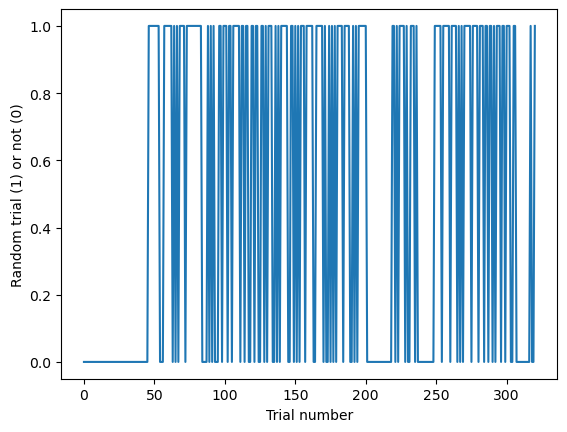

In [10]:
chosen_t = list(trial_data.keys())
print(chosen_t)
# find index of value 200 in chosen_t
# print(chosen_t.index(200))
# print(trials['stim_is_random'].tolist())
# print(max(chosen_t))
y = np.zeros(max(chosen_t)+1)
y[chosen_t] = 1
plt.plot(y)
plt.xlabel("Trial number")
plt.ylabel("Random trial (1) or not (0)")
plt.show()

In [11]:
# Covert column from categorical to one hot encoded vectors
def categorical_to_onehot(df, col):
    # get the dummies and store it in a variable
    dummies = pd.get_dummies(df[col])
    dummies.columns = [col+'_cat_'+str(x) for x in dummies.columns]
    return dummies

In [12]:
def add_c_if_dne(df, cols):
    for col in cols:
        if col not in df.columns:
            df[col] = 0
    df = df[cols]
    return df

In [13]:
# Merge the one-hot-encoded behavioral data
outcome_df = categorical_to_onehot(trials, 'outcome')
outcome_df = add_c_if_dne(outcome_df, ['outcome_cat_correct', 'outcome_cat_error', 'outcome_cat_spoil'])
choice_df = categorical_to_onehot(trials, 'choice')
choice_df = add_c_if_dne(choice_df, ['choice_cat_left', 'choice_cat_nogo', 'choice_cat_right'])

reward_df = categorical_to_onehot(trials, 'rewarded_side')
far_df = categorical_to_onehot(trials, 'servo_position')
rt_df = pd.DataFrame({'reaction-time': trials['choice_time'] - trials['response_window_open_time']})
rt_df.columns = ['rt']
# Filling reaction time with a large value
rt_df = rt_df.fillna(100)
# print(rt_df)
final_behavioral_data = pd.concat([outcome_df, choice_df, reward_df, far_df, rt_df], axis='columns')


In [14]:
final_behavioral_data.columns

Index(['outcome_cat_correct', 'outcome_cat_error', 'outcome_cat_spoil',
       'choice_cat_left', 'choice_cat_nogo', 'choice_cat_right',
       'rewarded_side_cat_left', 'rewarded_side_cat_right',
       'servo_position_cat_close', 'servo_position_cat_far',
       'servo_position_cat_medium', 'rt'],
      dtype='object')

In [15]:
# combine neural and behavioral data
for trial_idx, data in trial_data.items():
    data['u'] = final_behavioral_data.loc[trial_idx]

In [16]:
# Examine random trial
idx = np.random.choice(list(trial_data.keys()), 1)[0]
behave = trial_data[idx]['u']
spikes = trial_data[idx]['spikes']
print(spikes.shape)

(25, 35)


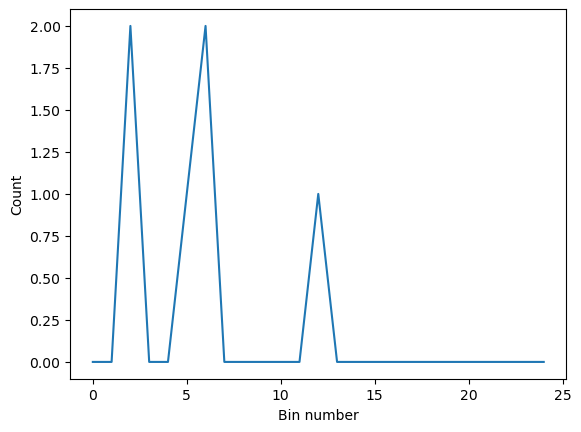

In [17]:
# choose random neuron
idx = np.random.choice(range(spikes.shape[1]))
plt.plot(spikes[:, idx])
plt.xlabel("Bin number")
plt.ylabel("Count")
plt.show()

In [18]:
with open(os.path.join(base_path, 'amplitudes.pkl'), 'rb') as f:
    amplitudes = pickle.load(f)
    print("Loaded amplitudes")

Loaded amplitudes


In [19]:
# Dump them
final_u, final_x = [], []
not_in_db = []
for trial, data in trial_data.items():
    # if trial not in amplitudes:
    #     print("Trial {} not in database".format(trial))
    #     continue
    # list of bins is of shape (time [num_bins], num_neurons)
    final_x.append(data['spikes'])
    num_bins = final_x[-1].shape[0]
#     print(num_bins)
    u = data['u'].to_numpy()
    # u is of shape (1, dim_u)
    # we need to repeat it 'time' times since each spike needs to have a corresponding behavioral variable
    tiled_u = np.tile(u, (num_bins, 1))
    time_info = np.arange(start=0, stop=num_bins, step=1)[:, None]/num_bins
    final_u.append(np.concatenate((tiled_u, time_info), axis=1))
#     print(final_u[-1])

print("Total number of trials:", len(final_x))
with open(base_path+'/shape_processed_behave_spike_{}_ms'.format(int(bin_len*1000)), 'wb') as f:
    pickle.dump((final_u, final_x), f)
    print("Dumped data for {} neural bins".format(sum([len(x) for x in final_u])))

Total number of trials: 161
Dumped data for 4025 neural bins


## Add whisker data
Apart from trial-level behavioral data as u, we can also add frame-level whisker contact data as observations by converting them to bin-level variables.

To do this, we iterate over whiskers _w_ and for each bin, maintain a count called _whisker_w_ which holds the number of contacts made by that particular whisker during that bin

In [27]:
# Need to extract left and right licks. How can t < 0?
# Currently not processing licks
licks_right = nwbfile.processing['behavior']['licks']['right'].timestamps[:]
licks_left = nwbfile.processing['behavior']['licks']['left'].timestamps[:]

In [21]:
# measure number of contacts of each whisker in each bin
# nwbfile.processing['behavior']['contacts_by_whisker_C1'][:]
nwbfile.processing['behavior']['contacts_by_whisker_C2'][:]

,start_time,stop_time,base_x,base_y,tip_x,tip_y,angle,frame_start,frame_stop,duration_frames
id,,,,,,,,,,
0,2.405,2.410,603.155483,274.260354,385.097856,408.938178,31.700200,481,482,2
1,2.465,2.480,601.713766,300.844835,408.486868,421.485076,31.953379,493,496,4
2,3.090,3.095,599.232167,291.774905,400.642206,414.539306,31.725460,618,619,2
3,3.985,4.000,599.599531,292.278095,401.308442,419.350696,32.663665,797,800,4
4,7.390,7.395,602.238865,278.837862,386.242861,409.124004,31.094341,1478,1479,2
...,...,...,...,...,...,...,...,...,...,...
2723,3514.605,3514.615,600.948075,281.952334,396.309312,415.740139,33.198039,702921,702923,3
2724,3514.720,3514.730,599.071740,296.588415,404.980810,419.762096,32.398627,702944,702946,3
2725,3516.185,3516.190,600.510812,286.522724,400.304467,418.871986,33.472336,703237,703238,2


In [22]:
nwbfile.processing['behavior']

behavior pynwb.base.ProcessingModule at 0x5976394336
Fields:
  data_interfaces: {
    contacts_by_whisker_C0 <class 'pynwb.epoch.TimeIntervals'>,
    contacts_by_whisker_C1 <class 'pynwb.epoch.TimeIntervals'>,
    contacts_by_whisker_C2 <class 'pynwb.epoch.TimeIntervals'>,
    contacts_by_whisker_C3 <class 'pynwb.epoch.TimeIntervals'>,
    licks <class 'pynwb.behavior.BehavioralEvents'>,
    processed_position_whisker_C0 <class 'pynwb.behavior.BehavioralTimeSeries'>,
    processed_position_whisker_C1 <class 'pynwb.behavior.BehavioralTimeSeries'>,
    processed_position_whisker_C2 <class 'pynwb.behavior.BehavioralTimeSeries'>,
    processed_position_whisker_C3 <class 'pynwb.behavior.BehavioralTimeSeries'>,
    raw_position_whisker_C0 <class 'abc.PoseEstimation'>,
    raw_position_whisker_C1 <class 'abc.PoseEstimation'>,
    raw_position_whisker_C2 <class 'abc.PoseEstimation'>,
    raw_position_whisker_C3 <class 'abc.PoseEstimation'>,
    rewards <class 'pynwb.behavior.BehavioralEvents'>

In [23]:
# for each trial, initialise an empty array of shape (num_bins, 8)
# where first 4 store number of contacts and last 4 store angle
contact_data = {trial_id: np.zeros((trial_data[trial_id]['spikes'].shape[0], 8)) for trial_id in trial_data.keys()}
# iterate over each whisker
for whisker in [0, 1, 2, 3]:
    df = nwbfile.processing['behavior']['contacts_by_whisker_C{}'.format(whisker)][:]
    for contact_id, data in df.iterrows():
        start_t, end_t, angle = data['start_time'], data['stop_time'], data['angle']
        trial_id = trials[(trials['start_time'] <= start_t) & (trials['stop_time'] >= end_t)].index
        if len(trial_id) != 1:
            warnings.warn("Whisker contact split across trials or no such trial")
        trial_id = trial_id[0]
        if trial_id not in contact_data.keys():
            continue
        trial_start = trial_data[trial_id]['start_t']
        bin_number_start = get_bin(trial_start, start_t)
        bin_number_end = get_bin(trial_start, end_t)
        # print(bin_number_start, bin_number_end, trial_start, start_t, end_t)
        for c_bin in range(bin_number_start, bin_number_end+1):
            if c_bin >= contact_data[trial_id].shape[0]:
                warnings.warn("Index exceeds max")
                continue
            contact_data[trial_id][c_bin, whisker] += 1
        # if multiple contacts in the same bin, last contact is chosen as angle
            contact_data[trial_id][c_bin, whisker+4] = angle/360            

/var/folders/d9/5kr9n8rj3t18qph0lvrgf3dw0000gn/T/ipykernel_94324/1621607327.py:21: UserWarning: Index exceeds max
  warnings.warn("Index exceeds max")


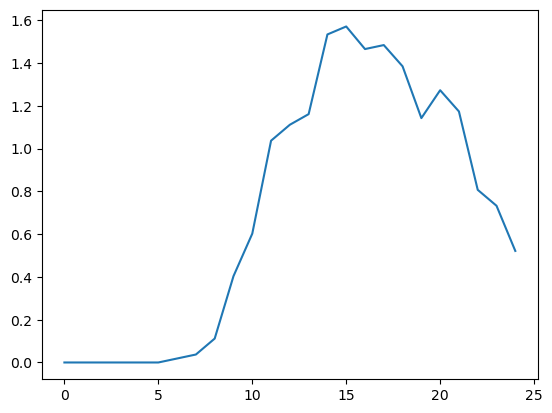

In [24]:
dat = []
for trial_id, data in contact_data.items():    
    dat.append(np.sum(data[:, 0:4], axis=1))
plt.plot(np.mean(np.array(dat), axis=0))

In [25]:
# Concatenate trial-level u with whisker contacts and dump
# Dump them
final_u, final_x = [], []
for trial, data in trial_data.items():    
    if trial not in amplitudes:
        print("Trial {} not in database".format(trial))
        amplitudes[trial] = [0]*data['spikes'].shape[0]
        # continue
    # list of bins is of shape (time [num_bins], num_neurons)
    final_x.append(data['spikes'])
    num_bins = final_x[-1].shape[0]
    u = data['u'].to_numpy()
    # u is of shape (1, dim_u)
    # we need to repeat it 'time' times since each spike needs to have a corresponding behavioral variable
    repeated_u = np.tile(u, (num_bins, 1))
    time_info = np.arange(start=0, stop=num_bins, step=1)[:, None]/num_bins
    contact_u = contact_data[trial]      
    amp = np.array(amplitudes[trial])[:, None]
    final_u.append(np.concatenate((repeated_u, contact_u, time_info, amp), axis=1))

print("Total number of trials:", len(final_x))
with open(base_path+'/shape_processed_behave_spike_contact_{}_ms'.format(int(bin_len*1000)), 'wb') as f:
    pickle.dump((final_u, final_x), f)
    print("Dumped data for {} neural bins".format(sum([len(x) for x in final_u])))

Trial 317 not in database
Trial 320 not in database
Total number of trials: 161
Dumped data for 4025 neural bins
